In [1]:
# Task 7: Breast Cancer Classification using Support Vector Machine (SVM)

# ✅ Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# ✅ Step 2: Load and Prepare Dataset
df = pd.read_csv("breast-cancer.csv")

In [3]:
# Drop 'id' column (not needed)
df.drop("id", axis=1, inplace=True)

In [4]:
# Encode 'diagnosis': M = 1 (Malignant), B = 0 (Benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [5]:
# ✅ Step 3: Split into Features and Target
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

In [6]:
# ✅ Step 4: Split into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# ✅ Step 5: Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# ✅ Step 6: Train SVM with Linear Kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)

In [9]:
# ✅ Step 7: Evaluate Linear SVM
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print("\nClassification Report (Linear):\n")
print(classification_report(y_test, y_pred_linear))

Linear SVM Accuracy: 0.956140350877193

Classification Report (Linear):

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



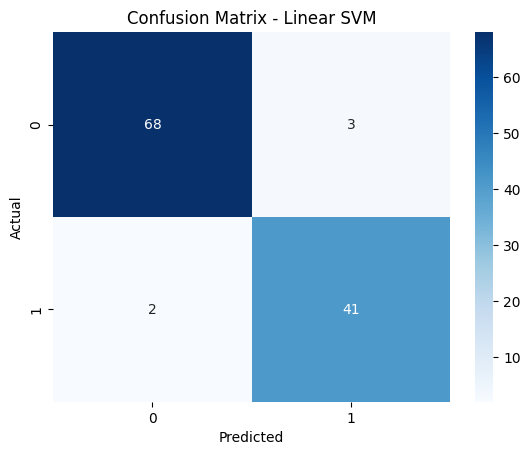

In [10]:
cm_linear = confusion_matrix(y_test, y_pred_linear)
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Linear SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [11]:
# ✅ Step 8: Train SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)

In [12]:
# ✅ Step 9: Evaluate RBF SVM
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("\nClassification Report (RBF):\n")
print(classification_report(y_test, y_pred_rbf))

RBF SVM Accuracy: 0.9824561403508771

Classification Report (RBF):

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



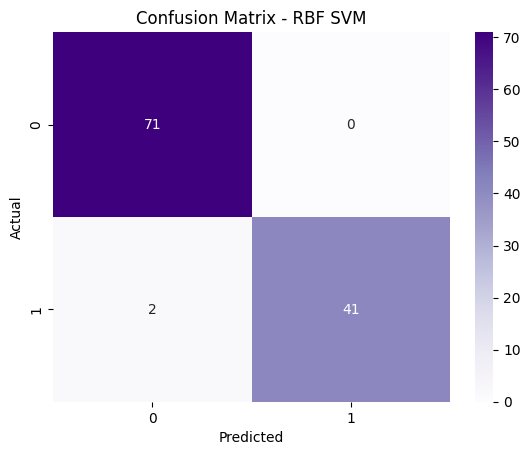

In [13]:
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - RBF SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [14]:
# ✅ Step 10: Hyperparameter Tuning (RBF Kernel)
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]})

In [15]:
print("\nBest Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", round(grid.best_score_, 4))


Best Parameters: {'C': 10, 'gamma': 0.01}
Best Cross-Validation Score: 0.9714


In [16]:
# ✅ Step 11: Evaluate Tuned Model on Test Set
y_pred_best = grid.best_estimator_.predict(X_test_scaled)
print("\nTuned RBF SVM Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report (Tuned RBF):\n")
print(classification_report(y_test, y_pred_best))


Tuned RBF SVM Accuracy: 0.9824561403508771

Classification Report (Tuned RBF):

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [17]:
# ✅ Step 12: Cross-Validation Accuracy
cv_scores = cross_val_score(grid.best_estimator_, X, y, cv=5)
print("\nCross-validation scores (5-fold):", cv_scores)
print("Average CV accuracy:", round(np.mean(cv_scores), 4))


Cross-validation scores (5-fold): [0.62280702 0.62280702 0.63157895 0.64035088 0.61946903]
Average CV accuracy: 0.6274


In [18]:
# (Optional) Step 13: PCA Visualization (2D)
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaler.fit_transform(X))

In [20]:
svm_vis = SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
svm_vis.fit(X_pca, y)

SVC(C=10, gamma=0.01)

In [21]:
# Mesh grid for boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

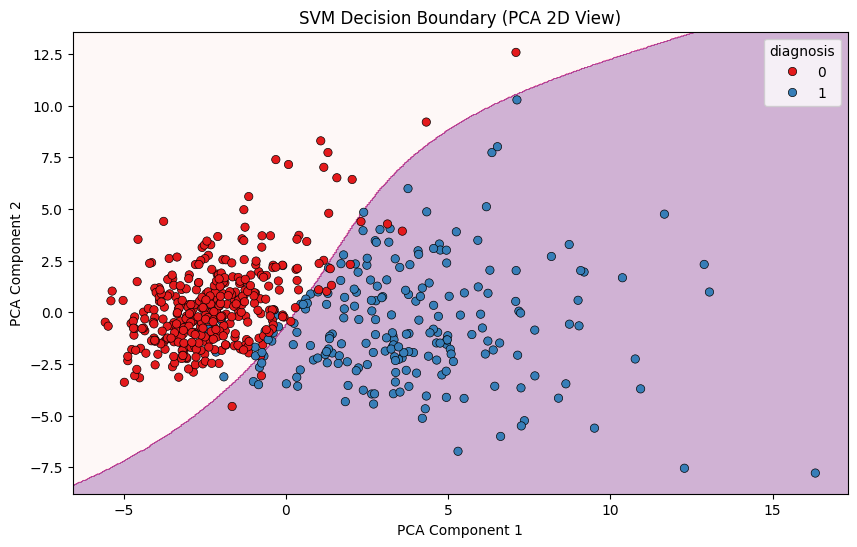

In [22]:
# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdPu')
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1', edgecolor='k')
plt.title("SVM Decision Boundary (PCA 2D View)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
